## Testing ipyrad on my data

**20170524**

I ran a branching assembly with 80%, 82%, and 85% similarity last week with the hopes of comparing the number of loci out the back end, as well as the Fis distribution and other metrics. While trying to do all of that this week, I talked with a collaborator who uses ipyrad and she realized that I didn't use the adapter filtering parameter and that this could influence my results. So, rerunning that assembly now. Need to change the params files first though, and I'll give them new assembly names to not rewrite over things quite yet.

So the original params files looked like this (below), with the clustering similarity changing between branches: cragig001 = .85, cragig002 - .82 and cragig003 = .8.

In [5]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py


In [7]:
!head -n 60 params-cragig001.txt

------- ipyrad params file (v.0.6.20)-------------------------------------------
cragig001                      ## [0] [assembly_name]: Assembly name. Used to name output directories for assembly steps
./                             ## [1] [project_dir]: Project dir (made in curdir if not present)
                               ## [2] [raw_fastq_path]: Location of raw non-demultiplexed fastq files
                               ## [3] [barcodes_path]: Location of barcodes file
/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py/demulti_files/*.fq                              ## [4] [sorted_fastq_path]: Location of demultiplexed/sorted fastq files
denovo                         ## [5] [assembly_method]: Assembly method (denovo, reference, denovo+reference, denovo-reference)
                               ## [6] [reference_sequence]: Location of reference sequence file
rad                            ## [7] [datatype]: Datatype (see docs): rad, gbs, ddrad, etc.
TGCAGG,                    

**New params files**

The major change is that parameter 16 will now be set to two. Otherwise, cragig001-003 will be the same as cragig004-006.

In [8]:
!head -n 60 params-cragig004.txt

------- ipyrad params file (v.0.6.20)-------------------------------------------
cragig001                      ## [0] [assembly_name]: Assembly name. Used to name output directories for assembly steps
./                             ## [1] [project_dir]: Project dir (made in curdir if not present)
                               ## [2] [raw_fastq_path]: Location of raw non-demultiplexed fastq files
                               ## [3] [barcodes_path]: Location of barcodes file
/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py/demulti_files/*.fq                              ## [4] [sorted_fastq_path]: Location of demultiplexed/sorted fastq files
denovo                         ## [5] [assembly_method]: Assembly method (denovo, reference, denovo+reference, denovo-reference)
                               ## [6] [reference_sequence]: Location of reference sequence file
rad                            ## [7] [datatype]: Datatype (see docs): rad, gbs, ddrad, etc.
TGCAGG,                    

Running outside the notebook because it always seems to crash inside the notebook.

### Filtering with vcftools for just biallelic data

Next step is filtering all of the VCF files for just biallelic data.

In [2]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py


In [3]:
!vcftools --vcf cragig004_outfiles/cragig004.vcf --min-alleles 2 --max-alleles 2 --out Edited_outfiles/cragig004_biall --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig004_outfiles/cragig004.vcf
	--max-alleles 2
	--min-alleles 2
	--out Edited_outfiles/cragig004_biall
	--recode

After filtering, kept 10 out of 10 Individuals
Outputting VCF file...
After filtering, kept 30950 out of a possible 31910 Sites
Run Time = 1.00 seconds


In [5]:
!vcftools --vcf cragig005_outfiles/cragig005.vcf --min-alleles 2 --max-alleles 2 --out Edited_outfiles/cragig005_biall --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig005_outfiles/cragig005.vcf
	--max-alleles 2
	--min-alleles 2
	--out Edited_outfiles/cragig005_biall
	--recode

After filtering, kept 10 out of 10 Individuals
Outputting VCF file...
After filtering, kept 29665 out of a possible 30593 Sites
Run Time = 0.00 seconds


In [6]:
!vcftools --vcf cragig006_outfiles/cragig006.vcf --min-alleles 2 --max-alleles 2 --out Edited_outfiles/cragig006_biall --recode


VCFtools - UNKNOWN
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf cragig006_outfiles/cragig006.vcf
	--max-alleles 2
	--min-alleles 2
	--out Edited_outfiles/cragig006_biall
	--recode

After filtering, kept 10 out of 10 Individuals
Outputting VCF file...
After filtering, kept 29057 out of a possible 29969 Sites
Run Time = 1.00 seconds


In [7]:
thresholds = [85,82,80]
biall_loci = [30950,29665,29057]

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Did the clustering similarity threshold parameter affect the number of biallelic loci out the back end?

Yes, as expected it increased as similarity threshold increased.

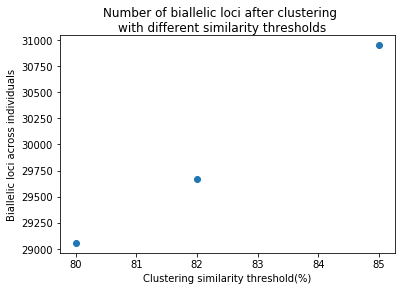

In [9]:
plt.scatter(thresholds,biall_loci)
plt.suptitle("Number of biallelic loci after clustering \nwith different similarity thresholds")
plt.xlabel("Clustering similarity threshold(%)")
plt.ylabel("Biallelic loci across individuals")
plt.show()

### Convert biallelic filtered VCF files into structure files for adegenet

Did this in PGD Spider outside of notebook.

In [18]:
cd /mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py/Edited_outfiles

/mnt/hgfs/SHARED_FOLDER/Learn_iPyrad/CRAGIG_RUN1_py/Edited_outfiles


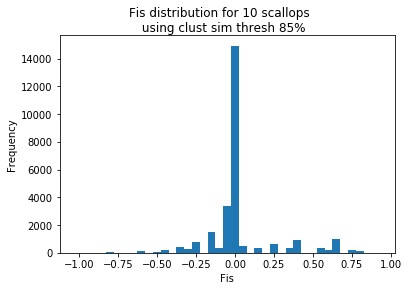

In [28]:
fis_004 = open("Fis_cragig004_20170531.txt", "r")
fis_004_lines = fis_004.readlines()
fis_004.close()

# get Fis into list
fis_004_list = []
for line in fis_004_lines[1:]: # skip header
    linelist = line.strip().split()
    fis = linelist[1]
    if fis != "NA":
        fis_004_list.append(float(fis))

        #plot
plt.hist(fis_004_list, bins = np.arange(-1, 1, .05)-.025)
plt.suptitle("Fis distribution for 10 scallops \n using clust sim thresh 85%")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

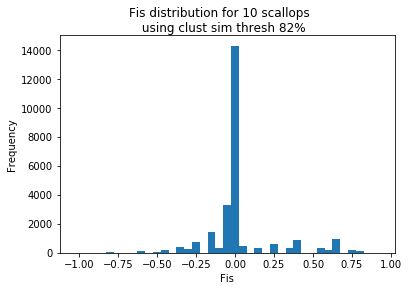

In [29]:
fis_005 = open("Fis_cragig005_20170531.txt", "r")
fis_005_lines = fis_005.readlines()
fis_005.close()

# get Fis into list
fis_005_list = []
for line in fis_005_lines[1:]: # skip header
    linelist = line.strip().split()
    fis = linelist[1]
    if fis != "NA":
        fis_005_list.append(float(fis))

        #plot
plt.hist(fis_005_list, bins = np.arange(-1, 1, .05)-.025)
plt.suptitle("Fis distribution for 10 scallops \n using clust sim thresh 82%")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

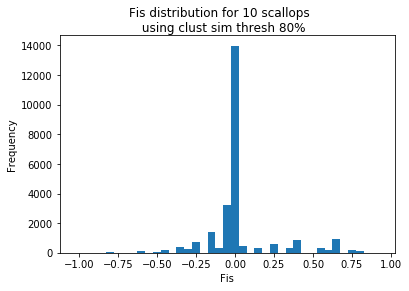

In [30]:
fis_006 = open("Fis_cragig006_20170531.txt", "r")
fis_006_lines = fis_006.readlines()
fis_006.close()

# get Fis into list
fis_006_list = []
for line in fis_006_lines[1:]: # skip header
    linelist = line.strip().split()
    fis = linelist[1]
    if fis != "NA":
        fis_006_list.append(float(fis))

        #plot
plt.hist(fis_006_list, bins = np.arange(-1, 1, .05)-.025)
plt.suptitle("Fis distribution for 10 scallops \n using clust sim thresh 80%")
plt.xlabel("Fis")
plt.ylabel("Frequency")
plt.show()

## Does the clustering similarity threshold affect the Fis distribution?

Barely if at all!

![img](https://github.com/nclowell/RAD_Scallops/blob/master/CRAGIG_run1/Notebooks/images_for_notebooks/comp_fis_10scallops_sim_20170531.png?raw=true)